# Machine Learning Assignment 4
## Naive Bayes Classification

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, f1_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Read the data
df = pd.read_csv('income_evaluation.csv')
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [11]:
# Clean column names by removing leading/trailing whitespace
df.columns = df.columns.str.strip()
print("Column names after cleaning:")
print(df.columns.tolist())

Column names after cleaning:
['age', 'workclass', 'fnlwgt', 'education', 'education-num', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country', 'income']


In [13]:
# Data preprocessing
# Convert categorical variables to numerical using Label Encoding
le = LabelEncoder()

# Updated categorical columns list with correct names
categorical_columns = ['workclass', 'education', 'marital-status', 'occupation',
                      'relationship', 'race', 'sex', 'native-country', 'income']

# Create a copy of the dataframe to avoid warnings
df_encoded = df.copy()

# Apply label encoding to each categorical column
for col in categorical_columns:
    df_encoded[col] = le.fit_transform(df_encoded[col].astype(str))

# Replace original dataframe with encoded version
df = df_encoded

# Display transformed data
print("\nFirst few rows after encoding:")
df.head()


First few rows after encoding:


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,7,77516,15,13,4,1,1,4,1,2174,0,40,33,0
1,50,6,83311,15,13,2,9,0,4,1,0,0,13,33,0
2,38,4,215646,3,9,0,11,1,4,1,0,0,40,33,0
3,53,4,234721,1,7,2,11,0,2,1,0,0,40,33,0
4,28,4,338409,15,13,2,2,5,2,0,0,0,40,37,0


In [14]:
# Separate features and target
X = df.drop(['income'], axis=1)
y = df['income']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=125)

In [15]:
# Create and train the model
model = GaussianNB()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print("Accuracy:", accuracy)
print("F1 Score:", f1)

Accuracy: 0.7997394379303927
F1 Score: 0.7720033087116254


<Figure size 800x600 with 0 Axes>

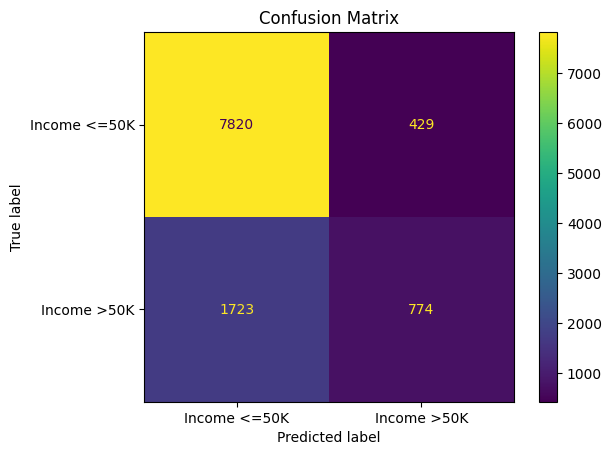

In [16]:
# Plot confusion matrix
labels = ["Income <=50K", "Income >50K"]
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
plt.figure(figsize=(8, 6))
disp.plot()
plt.title("Confusion Matrix")
plt.show()

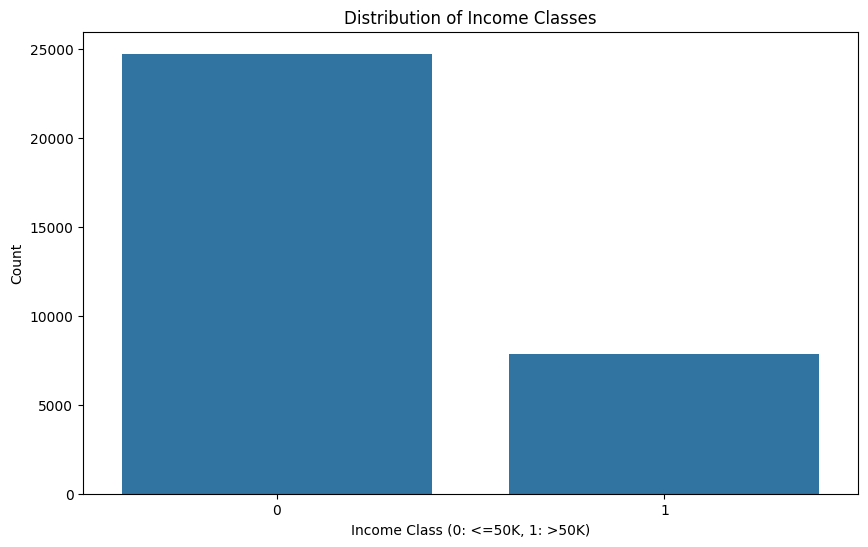

In [17]:
# Visualize distribution of income classes
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='income')
plt.title("Distribution of Income Classes")
plt.xlabel("Income Class (0: <=50K, 1: >50K)")
plt.ylabel("Count")
plt.show()

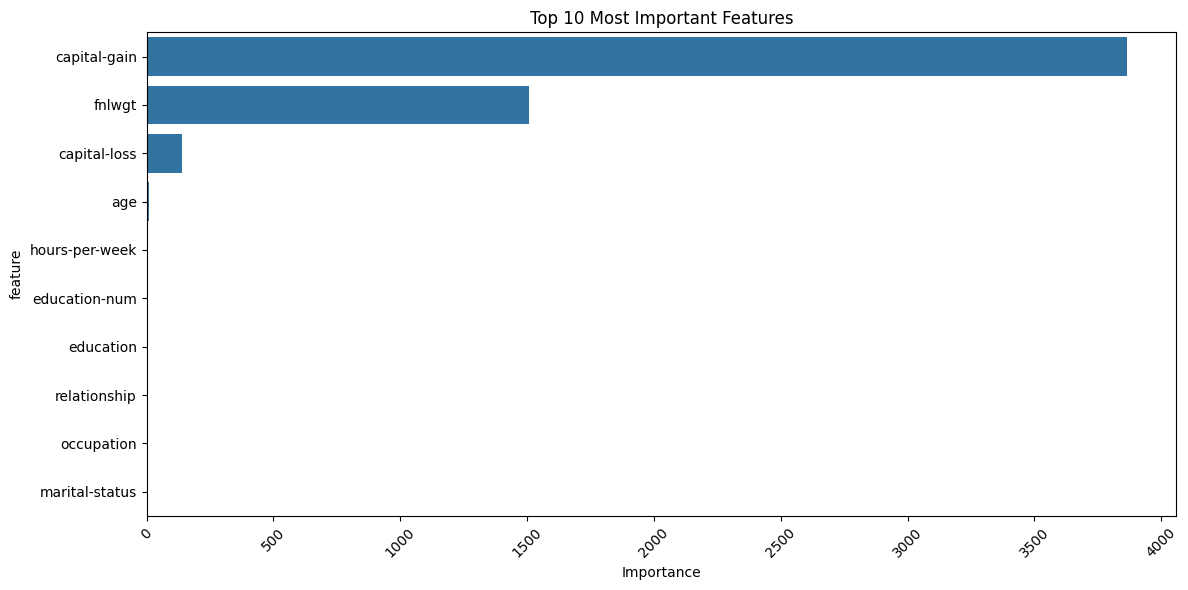

In [18]:
# Feature importance visualization
importances = pd.DataFrame({
    'feature': X.columns,
    'importance': np.abs(model.theta_[1] - model.theta_[0])  # Difference in means between classes
})
importances = importances.sort_values('importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importances.head(10), x='importance', y='feature')
plt.title("Top 10 Most Important Features")
plt.xlabel("Importance")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Example 1: Synthetic Dataset Classification
Let's first try Naive Bayes on a synthetic dataset to understand its behavior.

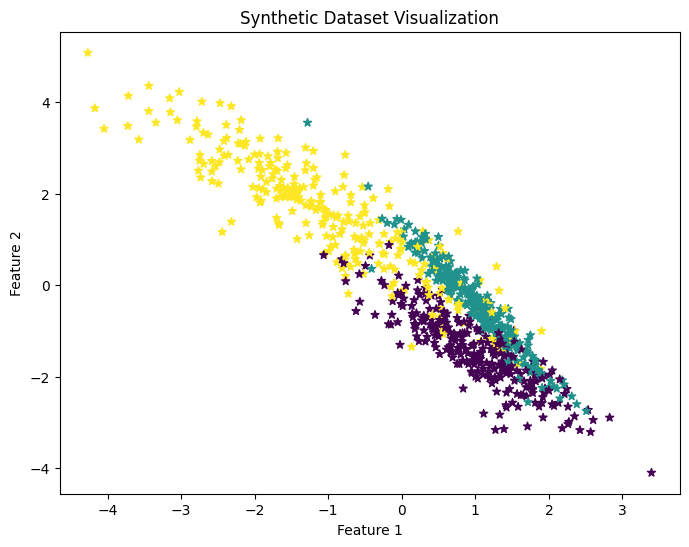

In [19]:
from sklearn.datasets import make_classification

# Generate synthetic dataset
X_synth, y_synth = make_classification(
    n_features=6,
    n_classes=3,
    n_samples=800,
    n_informative=2,
    random_state=1,
    n_clusters_per_class=1
)

# Visualize the dataset
plt.figure(figsize=(8, 6))
plt.scatter(X_synth[:, 0], X_synth[:, 1], c=y_synth, marker="*")
plt.title("Synthetic Dataset Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

In [20]:
# Split synthetic dataset
X_train_synth, X_test_synth, y_train_synth, y_test_synth = train_test_split(
    X_synth, y_synth, test_size=0.33, random_state=125
)

# Train and evaluate model
model_synth = GaussianNB()
model_synth.fit(X_train_synth, y_train_synth)

# Make predictions
y_pred_synth = model_synth.predict(X_test_synth)

# Calculate metrics
accuracy_synth = accuracy_score(y_test_synth, y_pred_synth)
f1_synth = f1_score(y_test_synth, y_pred_synth, average="weighted")

print("Synthetic Dataset Results:")
print(f"Accuracy: {accuracy_synth:.4f}")
print(f"F1 Score: {f1_synth:.4f}")

Synthetic Dataset Results:
Accuracy: 0.8485
F1 Score: 0.8479


## Example 2: Loan Dataset Classification
Now let's analyze a real-world loan dataset to predict loan payment status.

In [22]:
# Load and prepare loan dataset (assuming loan_data.csv is in the same directory)
try:
    loan_df = pd.read_csv('loan_data.csv')
    print("Loan dataset loaded successfully")
    
    # Data preprocessing
    loan_df_encoded = pd.get_dummies(loan_df, columns=['purpose'], drop_first=True)
    
    # Split features and target
    X_loan = loan_df_encoded.drop('not.fully.paid', axis=1)
    y_loan = loan_df_encoded['not.fully.paid']
    
    # Train test split
    X_train_loan, X_test_loan, y_train_loan, y_test_loan = train_test_split(
        X_loan, y_loan, test_size=0.33, random_state=125
    )
    
    # Train model
    model_loan = GaussianNB()
    model_loan.fit(X_train_loan, y_train_loan)
    
    # Evaluate
    y_pred_loan = model_loan.predict(X_test_loan)
    accuracy_loan = accuracy_score(y_test_loan, y_pred_loan)
    f1_loan = f1_score(y_test_loan, y_pred_loan, average="weighted")
    
    print("\nLoan Dataset Results:")
    print(f"Accuracy: {accuracy_loan:.4f}")
    print(f"F1 Score: {f1_loan:.4f}")
    
except FileNotFoundError:
    print("Note: loan_data.csv file not found. Please ensure the file exists in the correct location.")

Note: loan_data.csv file not found. Please ensure the file exists in the correct location.


## Naive Bayes Advantages and Limitations

### Advantages:
- Simple and fast algorithm
- Works well with large datasets
- Effective for both binary and multi-class problems
- Particularly good for text classification

### Limitations:
- Assumes feature independence (naive assumption)
- Zero frequency problem with unseen feature values
- May not perform well with highly correlated features